In [1]:
import os
import json
import pandas as pd
from src.gender import gender
from src.vycisti import vycisti
pd.set_option('display.max_columns', None)
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())
with open(os.path.join("data_fixes", "nelide.json"), encoding="utf-8") as nelide:
    nelide = json.loads(nelide.read())
df = vycisti(pd.read_json(os.path.join("data", "filmy.json")),opravy)

2023/05/28 23:31:25 z 4555 řádků odstraněno 125. Aktuální dataframe má 4430 řádků.


In [2]:
import re

In [3]:
herectvo = vycisti(pd.read_json(os.path.join("data", "herectvo.json")), opravy)

2023/05/28 23:31:26 z 108843 řádků odstraněno 3001. Aktuální dataframe má 105842 řádků.


In [4]:
herectvo

,Film,Role,Hraje,Mluví
30,Eastern – Krvavý Hugo (10173),Krvavý Hugo,Štefan Capko,NaN
31,Eastern – Krvavý Hugo (10173),stařenka,Hedvika Krupičková,NaN
32,Eastern – Krvavý Hugo (10173),holčička,Lucie Štepánková,NaN
33,Eastern – Krvavý Hugo (10173),pradlenka,Denisa Nová,NaN
34,Eastern – Krvavý Hugo (10173),muž,3277,NaN
...,...,...,...,...
108788,Knoflíkáři (9793),postava z dokumentu,Dennis Moran,NaN
108789,Knoflíkáři (9793),dívka vyvolávající duchy,Mariána Stojlovová,NaN
108790,Knoflíkáři (9793),dívka vyvolávající duchy,Bára Brodská,NaN
108791,Knoflíkáři (9793),dívka vyvolávající duchy,Julie Stolpovskich /ž/,NaN


In [5]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [6]:
df["Hlavní role"] = df["Hrají"].dropna().apply(lambda x: x[:3])
df["Vedlejší role"] = df["Hrají"].dropna().apply(lambda x: x[3:])
df = df.explode("Hrají")
df = df[df["Hrají"] != "neuvedeno"]

In [7]:
hraji = df[["Film","Copyright","Hrají"]].explode("Hrají")

In [8]:
hraji = hraji.merge(persony, left_on="Hrají", right_on="Jméno", how="outer")

In [9]:
hraji = hraji[hraji["Osoba"] != "právni"]

In [10]:
hraji

,Film,Copyright,Hrají,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
0,Alarm staroměstských hasičů (401719),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Žofínská plovárna (401718),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Voltýžování jízdního odboru Sokola pražského (...,1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Útok pražského dělostřelectva (401716),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Svatojanská pouť v českoslovanské vesnici (401...,1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138098,NaN,NaN,NaN,Reflex (99944),99944,None,právnická,Czech News Center,None,None,None,None,None,None,None,None,None,NaN,NaN
138099,NaN,NaN,NaN,Alexandra Sasínová (9996),9996,,fyzická,None,None,None,None,None,None,None,None,None,None,NaN,NaN
138100,NaN,NaN,NaN,plutoon s. r. o. (99962),99962,None,právnická,plutoon,None,None,None,None,None,None,None,None,None,NaN,NaN
138101,NaN,NaN,NaN,Čechomor (person),person,None,právnická,None,None,None,None,None,None,None,None,None,None,NaN,NaN


In [11]:
hraji["Věk"] = hraji["Copyright"] - hraji["Rok narození"]

## Obecná data

In [12]:
len(herectvo["Hraje"].drop_duplicates().to_list())

37373

In [13]:
veskere_herectvo = df["Hrají"].drop_duplicates().to_list()

In [14]:
len(veskere_herectvo)

37318

In [15]:
obsazovanost = pd.Series(herectvo.groupby("Hraje")["Film"].nunique(), name="Obsazovanost")

In [16]:
obsazovanost.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     1.0
0.750     1.0
0.900     4.0
0.950     9.0
0.990    40.0
Name: Obsazovanost, dtype: float64

In [17]:
obsazovanost2 = pd.Series(df.groupby("Hrají")["Film"].nunique(), name="Obsazovanost 2")

In [18]:
obsazovanost2.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     1.0
0.750     1.0
0.900     4.0
0.950     9.0
0.990    40.0
Name: Obsazovanost 2, dtype: float64

In [19]:
q = obsazovanost2.quantile(0.95)
q

9.0

In [20]:
q2 = obsazovanost2.quantile(0.98)
q2

23.68000000000029

## Nejdelší a nejplodnější kariéry

In [21]:
delka_kariery = pd.Series(hraji.groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Anna Burianová                106.0
Marie Novotná                  88.0
Jiří Klečka                    82.0
Karel Dvořák                   82.0
Jiřina Bohdalová (2878)        79.0
None                           79.0
František Kovářík (126912)     77.0
Kühnův dětský sbor (22659)     76.0
Zdenka Procházková (42989)     75.0
Zita Kabátová (839)            73.0
Name: Délka kariéry, dtype: float64

In [22]:
delka_kariery = pd.Series(hraji[~(hraji["Rok úmrtí"] <= (hraji["Copyright"]) - 1)].groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Anna Burianová                106.0
Marie Novotná                  88.0
Karel Dvořák                   82.0
Jiří Klečka                    82.0
Jiřina Bohdalová (2878)        79.0
None                           79.0
Kühnův dětský sbor (22659)     76.0
Zdenka Procházková (42989)     75.0
Černý                          73.0
Zita Kabátová (839)            73.0
Name: Délka kariéry, dtype: float64

In [23]:
hraji.groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan W. Speerger (55928)        276
Theodor Pištěk (37366)         251
Eman Fiala (64088)             211
Jaroslav Marvan (9550)         208
František Filipovský (4735)    181
Alois Dvorský (127491)         167
Oldřich Velen (12725)          166
Milka Balek-Brodská (28799)    163
Josef Kemr (4897)              161
Jaroslav Tomsa (2576)          152
Name: Film, dtype: int64

In [24]:
hraji.groupby(["Hrají","Copyright"])["Film"].nunique().nlargest()

Hrají                    Copyright
Jan W. Speerger (55928)  1937.0       20
Theodor Pištěk (37366)   1938.0       20
Jan W. Speerger (55928)  1938.0       19
Theodor Pištěk (37366)   1937.0       19
Jaroslav Marvan (9550)   1938.0       18
Name: Film, dtype: int64

In [25]:
vsechno_herectvo = df["Hrají"].drop_duplicates().to_list()

In [26]:
nejaktivnejsich500 = hraji.groupby("Hrají")["Film"].nunique().nlargest(500).index.to_list()

In [27]:
nejaktivnejsich500

['Jan W. Speerger (55928)',
 'Theodor Pištěk (37366)',
 'Eman Fiala (64088)',
 'Jaroslav Marvan (9550)',
 'František Filipovský (4735)',
 'Alois Dvorský (127491)',
 'Oldřich Velen (12725)',
 'Milka Balek-Brodská (28799)',
 'Josef Kemr (4897)',
 'Jaroslav Tomsa (2576)',
 'Václav Trégl (35224)',
 'Vladimír Hlavatý (34999)',
 'Josef Hlinomaz (26212)',
 'Karel Hovorka (76534)',
 'Vladimír Řepa (127334)',
 'Jiří Lír (4926)',
 'Vladimír Menšík (126036)',
 'F. X. Mlejnek (128287)',
 'Karel Augusta (5058)',
 'František Kreuzmann (75624)',
 'Vladimír Navrátil (12670)',
 'Lubomír Kostelka (841)',
 'Bohuš Záhorský (53346)',
 'Mirko Musil (33555)',
 'Ota Motyčka (81341)',
 'Jindřich Plachta (5829)',
 'Rudolf Hrušínský st. (4842)',
 'Josef Somr (1054)',
 'Vlastimil Brodský (833)',
 'Jan Kuželka (1445)',
 'Jiřina Bílá (3629)',
 'Miloš Kopecký (4959)',
 'Václav Kotva (2718)',
 'Zdeněk Srstka (7960)',
 'Ella Nollová (127319)',
 'Hermína Vojtová (127041)',
 'Jaroslav Vojta (77195)',
 'Karel Engel (1439

<AxesSubplot:xlabel='Copyright'>

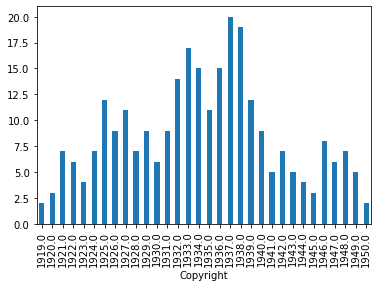

In [28]:
hraji[hraji["Hrají"] == "Jan W. Speerger (55928)"].groupby("Copyright")["Film"].nunique().plot.bar()

In [29]:
hraji[(~hraji["Datum narození"].isnull()) & hraji["Datum úmrtí"].isnull()].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan Kuželka (1445)            115
Jiří Lábus (838)              100
Jan Přeučil (4990)             93
Karel Hábl (27177)             92
Jan Kraus (1062)               84
Jiří Krampol (4985)            83
Oldřich Vlach (14387)          78
Jiřina Bohdalová (2878)        76
Ondřej Vetchý (836)            76
Jitka Zelenohorská (34821)     74
Name: Film, dtype: int64

In [30]:
hraji[hraji["Hrají"] == "Jiřina Bohdalová (2878)"][["Copyright","Film","Věk"]].sort_values(by="Copyright").head(10)

,Copyright,Film,Věk
24449,1937.0,Pižla a Žižla na cestách (395752),6.0
24450,1939.0,Zlatý člověk (395859),8.0
24451,1940.0,Madla zpívá Evropě (395922),9.0
24452,1940.0,Dceruška k pohledání (395926),9.0
24453,1940.0,Babička (395928),9.0
24454,1947.0,Muzikant (396045),16.0
24455,1952.0,Únos (396149),21.0
24456,1955.0,Direktiva (396228),24.0
24457,1955.0,Něco se tu změnilo (396202),24.0
24462,1956.0,Zaostřit prosím! (396247),25.0


## Další rekordy

In [31]:
hraji[hraji["Věk"] <= 18].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Salač (126323)        21
Vladimír Bejval (15695)        17
Vladimír Zátka (128952)        16
Filip Renč (558)               15
Josef Kemr (4897)              14
Michael Hofbauer (13613)       14
Josef Filip (127149)           13
Zuzana Ondrouchová (126513)    13
Andrea Čunderlíková (14417)    12
Jan Kraus (1062)               12
Name: Film, dtype: int64

In [32]:
hraji[hraji["Věk"] <= 12].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Zátka (128952)    12
Jan Kreidl (128115)        10
Josef Filip (127149)       10
Tomáš Holý (27091)         10
Vladimír Bejval (15695)    10
Dagmar Appelová (28474)     9
Hanuš Bor (7070)            9
Lukáš Bech (23548)          9
Marta Fričová (127372)      9
Michal Koblic (128743)      9
Name: Film, dtype: int64

In [33]:
hraji[hraji["Věk"] >= 67].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Josef Střecha (55613)        68
Vlastimila Vlková (27109)    55
Alois Dvorský (127491)       47
Josef Oliak (128024)         40
Antonín Soukup (87404)       37
Marie Rosůlková (4751)       36
Vladimír Hlavatý (34999)     36
Josef Příhoda (128694)       35
Slávka Hamouzová (84688)     34
Bohdan Lachman (128508)      33
Name: Film, dtype: int64

In [34]:
hraji[hraji["Věk"] >= 80].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Josefa Pechlátová (126344)    15
Marie Rosůlková (4751)        12
František Kovářík (126912)    11
Antonín Soukup (87404)        10
Stanislav Zindulka (835)      10
Vlastimila Vlková (27109)     10
Jan Skopeček (8252)            9
Lubomír Lipský (9728)          9
Alois Dvorský (127491)         8
Antonín Zacpal (27111)         8
Name: Film, dtype: int64

## Kolegové

In [35]:
df["Spoluherectvo"] = df["Film"].map(df.groupby("Film")["Hrají"].agg(list))

In [36]:
def kolegove(jmeno):
    kolegove = df[df["Hrají"] == jmeno]["Spoluherectvo"].to_list()
    kolegove2 = [item for kolegove in kolegove for item in kolegove]
    kolegove = []
    for k in kolegove2:
        if k not in kolegove:
            kolegove.append(k)
    return(kolegove)

In [37]:
len(kolegove("Jiřina Bohdalová (2878)"))

1793

## Červí díry

In [38]:
prvni = hraji["Copyright"].min()
posledni = [hraji["Copyright"].max(), hraji["Copyright"].max()-1]

In [39]:
prvni_herectvo = hraji[hraji["Copyright"] == prvni]["Hrají"].drop_duplicates().to_list()
prvni_herectvo

[None,
 'Josef Šváb-Malostranský (55291)',
 'Ferdinand Gýra (60351)',
 'Marie Kříženecká (99776)']

In [40]:
posledni_herectvo = hraji[hraji["Copyright"].isin(posledni)]["Hrají"].drop_duplicates().to_list()
posledni_herectvo = [p for p in posledni_herectvo if p != "neuvedeno"]
posledni_herectvo

[None,
 'Marie Novotná',
 'Jan Kačer (1165)',
 'Iva Janžurová (1049)',
 'Pavel Nový (510)',
 'Zdeněk Dušek (993)',
 'Jiří Navrátil',
 'Jan Martínek',
 'Petr Štěpánek (5406)',
 'Miroslav Vladyka (513)',
 'Marek Vašut (3566)',
 'Václav Černý',
 'Boleslav Polívka (1556)',
 'Taťjana Medvecká (7064)',
 'Roman Skamene (6363)',
 'Ivo Strangmüller (4401)',
 'Daniela Kolářová (1847)',
 'Luděk Sobota (15687)',
 'Ivan Pokorný (4848)',
 'Petr Jákl st. (3654)',
 'Jan Blažek',
 'Marie Čápová',
 'Jiří Bartoška (827)',
 'Jan Kuželka (1445)',
 'Josef Lébr',
 'Václav Vydra nejml. (2666)',
 'Jiří Lábus (838)',
 'Otakar Brousek ml. (2989)',
 'Alois Švehlík (6277)',
 'Jan Pospíšil',
 'Zuzana Bydžovská (4683)',
 'Jiří Balvín',
 'Vladislav Beneš (14686)',
 'Milan Šteindler (1572)',
 'Uršula Kluková (12475)',
 'František Ringo Čech (11726)',
 'Vlasta Žehrová (2776)',
 'Rostislav Novák st. (40328)',
 'Tomáš Jirsa',
 'Daniela Vacková (27460)',
 'Vlastimil Venclík (27245)',
 'Tomáš Hanák (198)',
 'Petr Drozda (1

In [41]:
cervi_diry = []
cervi_filmy = []
for n in vsechno_herectvo:
    if n:
        if "(" in n:
            spolu = kolegove(n)
            for x in prvni_herectvo:
                if x:
                    if "(" in x:
                        if x in spolu:
                            for y in posledni_herectvo:
                                if y:
                                    if "(" in y:
                                        if y in spolu:
                                            print(f"{n}, {x}, {y}")
                                            n_filmy = df[df["Hrají"] == n]["Film"].drop_duplicates().to_list()
                                            y_filmy = df[df["Hrají"] == y]["Film"].drop_duplicates().to_list()
                                            z_filmy = []
                                            for nf in n_filmy:
                                                if nf in y_filmy:
                                                    z_filmy.append(nf)
                                                    cervi_filmy.append(nf)
                                            print(z_filmy)
                                            print("***")
                                            cervi_diry.append(n)

Jarmila Kronbauerová (128121), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
Bedřich Vrbský (83528), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Jan Kačer (1165)
['Údolí včel (396722)', 'Velká neznámá (396861)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Pavel Nový (510)
['Kuřata na cestách (396497)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Petr Štěpánek (5406)
['Údolí včel (396722)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Taťjana Medvecká (7064)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['Na samotě u lesa (397110)']
***
František Kovářík (126912), 

Zdeněk Štěpánek (87457), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Znamení Raka (396675)']
***
Jára Kohout (4846), Josef Šváb-Malostranský (55291), Pavel Nový (510)
['Divoké pivo (8405)']
***
Jára Kohout (4846), Josef Šváb-Malostranský (55291), Miroslav Vladyka (513)
['Divoké pivo (8405)']
***
Jára Kohout (4846), Josef Šváb-Malostranský (55291), Roman Skamene (6363)
['Ještě větší blbec, než jsme doufali (7782)', 'Divoké pivo (8405)']
***
Jára Kohout (4846), Josef Šváb-Malostranský (55291), Luděk Sobota (15687)
['Ještě větší blbec, než jsme doufali (7782)', 'Divoké pivo (8405)']
***
Jára Kohout (4846), Josef Šváb-Malostranský (55291), Jiří Lábus (838)
['Divoké pivo (8405)']
***
Jára Kohout (4846), Josef Šváb-Malostranský (55291), Jiří Langmajer (2981)
['Ještě větší blbec, než jsme doufali (7782)']
***
Jára Kohout (4846), Josef Šváb-Malostranský (55291), Martin Hub (7650)
['Ještě větší blbec, než jsme doufali (7782)']
***
Alois Dvorský (127491), Josef Šváb-Malostranský (552

In [42]:
cervi_diry

['Jarmila Kronbauerová (128121)',
 'Bedřich Vrbský (83528)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'František Kovářík (126912)',
 'Antonín Meisner (127732)',
 'Eman Fiala (64088)',
 'Eman Fiala (64088)',
 'Eman Fiala (64088)',
 'L. H. Struna (126711)',
 'L. H. Struna (126711)',
 'L. H. Struna (126711)',
 'L. H. Struna (126711)',
 'L. H. Struna (126711)',
 'Václav Vydra ml. (126535)',
 'Marta Májová (127723)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlavatý (34999)',
 'Vladimír Hlav

In [43]:
cervi_diry_seznam = list(set(cervi_diry))

In [44]:
len(cervi_diry_seznam)

25

In [45]:
cervi_diry_statistiky = {}
for c in cervi_diry:
    cervi_diry_statistiky[c] = cervi_diry.count(c)
cervi_diry_statistiky = pd.DataFrame.from_dict(cervi_diry_statistiky, orient="index").rename(columns={0: "propojení"})
cervi_diry_statistiky.sort_values(by="propojení",ascending=False).head(10)

,propojení
Vladimír Hlavatý (34999),30
Ela Šárková (126039),14
František Kovářík (126912),12
Darja Hajská (35228),12
Jára Kohout (4846),7
Gabriela Bártlová-Buddeusová (127814),5
Ela Poznerová (126572),5
L. H. Struna (126711),5
Nataša Gollová (36491),4
Alois Dvorský (127491),3


In [46]:
cervi_filmy_statistiky = {}
for c in cervi_filmy:
    cervi_filmy_statistiky[c] = cervi_filmy.count(c)
cervi_filmy_statistiky = pd.DataFrame.from_dict(cervi_filmy_statistiky, orient="index").rename(columns={0: "propojení"})
cervi_filmy_statistiky.sort_values(by="propojení",ascending=False).head(10)

,propojení
Přátelé bermudského trojúhelníku (397557),10
Velká filmová loupež (397520),7
Zelená vlna (397382),7
"„Marečku, podejte mi pero!“ (397112)",6
Divoké pivo (8405),5
Čintamani & podvodník (396606),4
Hodinářova svatební cesta korálovým mořem (397250),4
Láska z pasáže (397462),4
Handlíři (396548),4
Srdečný pozdrav ze zeměkoule (397365),4


In [47]:
cervi_diry_ciste = []
for c in cervi_diry_seznam:
    c = c.split(" (")[0]
    cervi_diry_ciste.append(c)
print(", ".join(cervi_diry_ciste))

Alois Dvorský, Slávka Doležalová-Kulhavá, Nataša Gollová, Frank Argus, Marie Nademlejnská, Gabriela Bártlová-Buddeusová, Marta Májová, František Kovářík, Jaroslav Marvan, Ela Poznerová, Anna Gabrielová, Světla Svozilová, Darja Hajská, Antonín Meisner, Vladimír Hlavatý, Josef Steigl, Bedřich Vrbský, L. H. Struna, Václav Wasserman, Jarmila Kronbauerová, Zdeněk Štěpánek, Jára Kohout, Eman Fiala, Ela Šárková, Václav Vydra ml.


In [48]:
hraji[hraji["Hrají"].isin(cervi_diry)].groupby("Copyright")["Rok úmrtí"].max().sort_values()

Copyright
1916.0    1966.0
1918.0    1975.0
1924.0    1975.0
1919.0    1980.0
1920.0    1980.0
           ...  
1961.0    1996.0
1957.0    1996.0
1956.0    1996.0
1936.0    1996.0
1939.0    1996.0
Name: Rok úmrtí, Length: 76, dtype: float64

### Opačný směr – pro ČRo

In [52]:
zijici_propojovatele = {}
for p in posledni_herectvo:
    kolegacci = kolegove(p)
    cervouni = []
    for k in kolegacci:
        if k in cervi_diry_seznam:
            cervouni.append(k)
    if cervouni:
        zijici_propojovatele[p] = cervouni
zijici_propojovatele

{'Jan Kačer (1165)': ['Vladimír Hlavatý (34999)',
  'Nataša Gollová (36491)',
  'František Kovářík (126912)'],
 'Iva Janžurová (1049)': ['Darja Hajská (35228)',
  'Eman Fiala (64088)',
  'L. H. Struna (126711)',
  'Josef Steigl (128760)',
  'Marta Májová (127723)',
  'Gabriela Bártlová-Buddeusová (127814)',
  'Jarmila Kronbauerová (128121)',
  'Světla Svozilová (126470)',
  'Jaroslav Marvan (9550)',
  'Bedřich Vrbský (83528)',
  'Frank Argus (28475)',
  'Slávka Doležalová-Kulhavá (84685)',
  'Zdeněk Štěpánek (87457)',
  'Vladimír Hlavatý (34999)',
  'Václav Vydra ml. (126535)',
  'Nataša Gollová (36491)',
  'František Kovářík (126912)',
  'Ela Poznerová (126572)'],
 'Pavel Nový (510)': ['František Kovářík (126912)',
  'Vladimír Hlavatý (34999)',
  'Ela Šárková (126039)',
  'Jára Kohout (4846)'],
 'Zdeněk Dušek (993)': ['L. H. Struna (126711)',
  'Alois Dvorský (127491)',
  'Marie Nademlejnská (127317)',
  'Darja Hajská (35228)',
  'Vladimír Hlavatý (34999)',
  'Ela Šárková (126039)'],


## Nejvíc oskarových filmů

In [53]:
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())

In [54]:
df[df["Film"].isin(seznamy["oskari"])].groupby("Hrají")["Film"].nunique().nlargest()

Hrají
Adam Matejka (126967)      1
Alois Vachek (130102)      1
Alojz Kramár               1
Andrej Chalimon (37311)    1
Andrej Šilan (59766)       1
Name: Film, dtype: int64

In [55]:
df[df["Film"].isin(seznamy["oskarianominace"])].groupby("Hrají")["Film"].nunique().nlargest()

Hrají
Milada Ježková (79014)      4
Libuše Šafránková (2272)    3
Zdeněk Svěrák (1892)        3
Antonín Blažejovský         2
Jan Tříska (4834)           2
Name: Film, dtype: int64

In [56]:
df[(df["Film"].isin(seznamy["oskarianominace"]) & (df["Hrají"] == "Milada Ježková (79014)"))]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Hlavní role,Vedlejší role,Spoluherectvo
2006,Lásky jedné plavovlásky (396651),Československo,1965,1965,festivalová premiéra srpen 1965 (26. mezináro...,77.0,[Miloš Forman (7872)],film,"[komedie, hořká komedie]","[hraný, distribuční]",Lásky jedné plavovlásky,Lásky jedné plavovlásky,Loves of a Blonde,None,Přihořívá / Láska jako prám,Milada Ježková (79014),"[Andula, klavírista Míla Vašata, záložák Vacov...",[Ivan Passer (7890)],None,"[Jaroslav Papoušek (4930), Ivan Passer (7890),...","[Jaroslav Papoušek (4930), Ivan Passer (7890),...",[Václav Šašek (1766)],[Miroslav Ondříček (3524)],[Rudolf Blaháček (14330)],[Karel Černý (1241)],None,[Rudolf Hammer (5119)],[Miroslav Hájek (54607)],[Adolf Böhm (126000)],None,[Rudolf Hájek (12756)],"[Jaroslav Solnička (85467), Otakar Jiříček]",None,[27434],None,[],Filmová komedie se sestrou Jany Brejchové v hl...,[Filmové studio Barrandov (96664)],None,[Státní fond kinematografie (124966)],"[Ústřední půjčovna filmů (106116), Národní fil...",dlouhometrážní,"[16mm, 35mm, DCP 2-D, BRD]",1.37,černobílý,zvukový,mono,česká,česky,bez titulků,české,Druhý celovečerní film Miloše Formana (natočen...,"Dívka s kytarou zpívá šlágr To, co bylo včera,...",[Miloš Forman (7872)],None,None,None,None,None,None,[6661],None,2195.0,None,Národní filmový archiv archivuje také 9. díl N...,None,None,None,None,None,None,None,None,None,None,None,"[2852, 22453, 8166, 7217, 129618, 2858, 2930, ...",None,None,"[Vladimír Mácha (127847), Vladimír Mácha, Rudo...","[Pavla Marková (36607), Jaromír Komárek (22275...",None,None,[Ladislav Chroust (59307)],None,None,None,None,"[Muži z Ria, Smích /Chi Chi/, Hej, panímámo, T...","[Jindřich Brabec (5311), Vokální soubor Lubomí...",schválení literárního scénáře 13. 5. 1964 ...,None,None,None,None,None,None,bez ateliérů,None,None,None,None,None,None,None,None,None,None,None,[Miloš Červinka (31108)],None,None,[Jaroslav Vlk (130440)],[Lilian Havlíčková (66986)],"[Zdena Šnajdarová (31117), Emilie Fišarová (20...",[Jitka Šulcová (129636)],None,None,None,"Národní filmový archiv, Obchodní oddělení",None,None,"Tvůrčí skupina Šebor – Bor, Vladimír Bor (vedo...",None,None,None,None,None,None,None,None,1965,1965,"[Hana Brejchová (81393), Vladimír Pucholt (222...","[Ivan Kheil, Jiří Hrubý (59333), Milada Ježkov...","[Han

## Hlavní a vedlejší role

In [57]:
hvezdnost = pd.Series(df.explode("Hlavní role").groupby("Hlavní role")["Film"].nunique() / df.explode("Hrají").groupby("Hrají")["Film"].nunique(), name="Hvězdnost")

In [58]:
hvezdy = pd.DataFrame([hvezdnost, obsazovanost2]).transpose().rename(columns={"Obsazovanost 2": "Obsazovanost"})
hvezdy

,Hvězdnost,Obsazovanost
2 Amiros,NaN,1.0
2 Arotty,NaN,1.0
2 Bertis,NaN,1.0
2 Olympos,NaN,1.0
2 Poldis,NaN,1.0
...,...,...
žáci královéhradeckých škol,NaN,1.0
žáci lyžařských sportovních základen v Krkonoších,NaN,1.0
žáci osmiletých středních škol v Gottwaldově,1.0,1.0
žáci pražských škol,NaN,1.0


In [59]:
hvezdy[(hvezdy["Obsazovanost"] >= q2) & (hvezdy["Hvězdnost"] > 0.5)].sort_values(by="Hvězdnost", ascending=False).head(50)

,Hvězdnost,Obsazovanost
Vlasta Burian (11992),0.970588,34.0
Suzanne Marwille (127373),0.900000,40.0
Hugo Haas (37289),0.766667,30.0
Anny Ondráková (127280),0.735294,34.0
Anna Geislerová (5433),0.710526,38.0
Karel Lamač (37847),0.698413,63.0
Karel Höger (38146),0.691176,68.0
Karel Roden nejml. (494),0.666667,54.0
Lída Baarová (5202),0.656250,32.0
Jana Brejchová (7710),0.650000,60.0


In [60]:
len(hvezdy[(hvezdy["Obsazovanost"] >= q2) & (hvezdy["Hvězdnost"] > 0.5)].sort_values(by="Hvězdnost", ascending=False).head(50))

31

In [61]:
nejvetsi_hvezdy_c_filmu = hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"] > 0.5)].sort_values(by="Hvězdnost", ascending=False).head(50).index.to_list()
super_hvezdy = []
for n in nejvetsi_hvezdy_c_filmu:
    n = n.split(" (")[0]
    super_hvezdy.append(n)
print(len(super_hvezdy))
print(", ".join(super_hvezdy))

50
Vlasta Burian, Andula Sedláčková, Suzanne Marwille, Rolf Wanka, Jaroslav Vízner, Růžena Nasková, Juraj Kukura, Hugo Haas, Jan Werich, Anny Ondráková, Anna Geislerová, Veronika Renčová, V. Ch. Vladimírov, Karel Lamač, Josef Filip, Karel Höger, Július Pántik, Lexa Jarošín, Karel Roden nejml., Václav Norman, Lída Baarová, Jana Brejchová, Jan Dolanský, Zdeněk Štěpánek, Oldřich Nový, Hana Vítová, Vlasta Matulová, Gustáv Valach, Tatiana Vilhelmová, Magda Vášáryová, Tomáš Holý, Nina Laušmanová, Leopolda Dostalová, Klára Issová, Karel Hašler, Jiří Mádl, Vojtěch Kotek, Eva Gerová, Jiří Vala, Božidara Turzonovová, Ivan Trojan, Jaromír Hanzlík, Eduard Cupák, Otomar Korbelář, Josef Šebánek, Jiřina Švorcová, Václav Voska, Žaneta Fuchsová, Ondřej Sokol, Ladislav Brom


In [62]:
df = df[["Hrají","Hlavní role","Vedlejší role","Film","Žánr","Copyright"]].explode("Hlavní role").explode("Vedlejší role")

In [63]:
df[df["Vedlejší role"] == "Vlasta Burian (11992)"]["Film"].drop_duplicates().to_list()

['Zaostřit prosím! (396247)']

In [64]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).head(10)

,Hvězdnost,Obsazovanost
Karel Hovorka (76534),NaN,135.0
Vladimír Navrátil (12670),NaN,126.0
Jan Kuželka (1445),NaN,115.0
Jiřina Bílá (3629),NaN,115.0
Zdeněk Srstka (7960),NaN,111.0
Karel Bělohradský (6370),NaN,101.0
Zdeněk Skalický (126510),NaN,93.0
Jan Cmíral (125562),NaN,92.0
Emanuel Hříbal (127758),NaN,92.0
Vítězslav Černý (126687),NaN,85.0


In [65]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).shape

(670, 2)

In [66]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (~hvezdy["Hvězdnost"].isnull())].sort_values(by="Hvězdnost", ascending=True).head(10)

,Hvězdnost,Obsazovanost
Jaroslav Tomsa (2576),0.006579,152.0
Karel Engel (14390),0.009174,109.0
Josef Oliak (128024),0.010870,92.0
Alois Dvorský (127491),0.011976,167.0
Karel Pavlík (126439),0.012658,79.0
Miloslav Homola (18975),0.012821,78.0
Vlastimila Vlková (27109),0.013333,75.0
Viktor Maurer (78076),0.013889,72.0
Karel Augusta (5058),0.015625,128.0
F. X. Mlejnek (128287),0.015625,128.0


In [67]:
df[df["Hlavní role"] == "Jaroslav Tomsa (2576)"]["Film"].drop_duplicates().to_list()

['Koncert (397284)']

## Typologie herců

In [68]:
df = df.explode("Hrají")

In [69]:
df = df.explode("Žánr")

In [70]:
df = df.replace("černá komedie","komedie").replace("bláznivá komedie","komedie").replace("hořká komedie","komedie").replace("smutná komedie","komedie")

In [71]:
df = df.merge(obsazovanost2, on="Hrají")

In [72]:
df

,Hrají,Hlavní role,Vedlejší role,Film,Žánr,Copyright,Obsazovanost 2
0,Josef Šváb-Malostranský (55291),Josef Šváb-Malostranský (55291),NaN,Smích a pláč (395110),anekdota,1898,78
1,Josef Šváb-Malostranský (55291),Josef Šváb-Malostranský (55291),NaN,Dostaveníčko ve mlýnici (395109),fraška,1898,78
2,Josef Šváb-Malostranský (55291),Ferdinand Gýra (60351),NaN,Dostaveníčko ve mlýnici (395109),fraška,1898,78
3,Josef Šváb-Malostranský (55291),Marie Kříženecká (99776),NaN,Dostaveníčko ve mlýnici (395109),fraška,1898,78
4,Josef Šváb-Malostranský (55291),Josef Šváb-Malostranský (55291),NaN,Výstavní párkař a lepič plakátů (395111),fraška,1898,78
...,...,...,...,...,...,...,...
26174256,Michaela Kubešová (102188),Iva Pazderková (23887),Jan Regner,Velká premiéra (402234),komedie,2022,1
26174257,Michaela Kubešová (102188),Iva Pazderková (23887),Lubomír Smékal (85364),Velká premiéra (402234),komedie,2022,1
26174258,Michaela Kubešová (102188),Iva Pazderková (23887),Lubomír Smékal (85364),Velká premiéra (402234),komedie,2022,1
26174259,Michaela Kubešová (102188),Iva Pazderková (23887),Michaela Kubešová (102188),Velká premiéra (402234),komedie,2022,1


In [73]:
zanry = df["Žánr"].drop_duplicates().to_list()

In [74]:
df.columns

Index(['Hrají', 'Hlavní role', 'Vedlejší role', 'Film', 'Žánr', 'Copyright',
       'Obsazovanost 2'],
      dtype='object')

In [75]:
for z in zanry:
    print(f"""{z}: {df[df["Žánr"] == z].groupby("Hrají")["Film"].nunique().nlargest(1)}""")

anekdota: Hrají
Adam Kuchta    1
Name: Film, dtype: int64
fraška: Hrají
Theodor Pištěk (37366)    9
Name: Film, dtype: int64
komedie: Hrají
Theodor Pištěk (37366)    115
Name: Film, dtype: int64
melodrama: Hrají
Theodor Pištěk (37366)    46
Name: Film, dtype: int64
drama: Hrají
Jan W. Speerger (55928)    88
Name: Film, dtype: int64
historický: Hrají
Oldřich Velen (12725)    20
Name: Film, dtype: int64
dobrodružný: Hrají
Radovan Lukavský (3301)    8
Name: Film, dtype: int64
fantastický: Hrají
Antonín Soukup (87404)    4
Name: Film, dtype: int64
kriminální: Hrají
Jiřina Bílá (3629)    16
Name: Film, dtype: int64
pohádka: Hrají
Jan Skopeček (8252)    10
Name: Film, dtype: int64
osvětový: Hrají
František Šlégr (127637)    4
Name: Film, dtype: int64
tragikomedie: Hrají
Jiří Menzel (7887)    8
Name: Film, dtype: int64
propagační: Hrají
Antonín Jedlička (4739)    3
Name: Film, dtype: int64
špionážní: Hrají
Jan Pohan (7665)    5
Name: Film, dtype: int64
hudební: Hrají
Karel Hovorka (76534)    

In [ ]:
for z in zanry:
    typicke_herectvo = pd.Series(df[(df["Žánr"] == z) & (df["Obsazovanost 2"] >= q2)].groupby("Hrají")["Film"].nunique() / df.groupby("Hrají")["Obsazovanost 2"].max()).nlargest(10)
    print(z)
    print(typicke_herectvo)
    print("***")

anekdota
Hrají
Jan Víšek (4757)             0.034483
Vladimír Klemens (128722)    0.034483
Pavla Maršálková (126529)    0.030303
Ilona Jirotková (126679)     0.026316
Tomáš Hanák (198)            0.025641
Jiřina Šejbalová (125559)    0.023256
František Kubíček (87096)    0.020833
Pavel Landovský (1136)       0.020833
Jiřina Jirásková (22836)     0.019231
Marta Richterová (27358)     0.018868
dtype: float64
***
fraška
Hrají
Josef Waltner (126405)             0.131579
Ada Karlovský (85828)              0.128205
Jindřich Adolf (13279)             0.125000
Alfred Baštýř (28814)              0.114286
Josef Sládek (18352)               0.111111
Mario Karas (101579)               0.090909
Karel Němec (128590)               0.084746
Josef Rovenský (37766)             0.083333
František Beranský (49046)         0.078947
Josef Šváb-Malostranský (55291)    0.076923
dtype: float64
***
komedie
Hrají
Vlasta Burian (11992)     0.852941
Hugo Haas (37289)         0.800000
Zdeněk Svěrák (1892)      0.77

detektivní
Hrají
Božena Böhmová (27878)       0.166667
Miloš Willig (82925)         0.156863
Jiří Němeček (4964)          0.140351
Bohumil Šmída (31114)        0.127660
Jana Štěpánková (14419)      0.121212
Alena Procházková (14497)    0.117647
Jana Andresíková (5378)      0.117647
Václav Wasserman (37326)     0.117647
Vladimír Ptáček (126428)     0.116279
Anna Gabrielová (4949)       0.115385
dtype: float64
***
sociální
Hrají
Marie Vášová (31606)           0.083333
Oleg Reif (7964)               0.083333
Frank Rose-Růžička (127740)    0.078431
Ludvík Veverka (127755)        0.068966
Bedřich Vrbský (83528)         0.065574
Karolína Vávrová (130338)      0.064516
Antonín Jirsa (129711)         0.058824
Antonín Šolc (129715)          0.055556
Ladislav Hemmer (127508)       0.051282
Jindřich Plachta (5829)        0.050420
dtype: float64
***
satira
Hrají
Karel Vavřík (128721)        0.206897
Jan Maška (126431)           0.189189
Milan Neděla (5016)          0.181818
František Suk (128789) 

rodinný
Hrají
Hynek Čermák (3370)         0.115385
Naďa Konvalinková (4988)    0.105263
Marek Taclík (9420)         0.096774
Jana Štěpánková (14419)     0.090909
Martin Faltýn (6096)        0.083333
Karel Dobrý (6362)          0.080000
Jaroslava Pokorná (2727)    0.076923
Nela Boudová (8226)         0.076923
Jan Vondráček (1713)        0.071429
Pavel Nový (510)            0.071429
dtype: float64
***
muzikál
Hrají
Milan Kindl (126442)         0.119048
Oskar Hák (7589)             0.108108
Bert Schneider (126653)      0.103448
Jiří Bruder (125486)         0.075000
Marie Popelková (35279)      0.068966
Miloslav Svoboda (127909)    0.064516
Pavel Spálený (126440)       0.062500
Eugen Jegorov (80974)        0.061538
Jan Maška (126431)           0.054054
Václav Štekl (4862)          0.053571
dtype: float64
***
budovatelský
Hrají
Hynek Němec (128790)          0.166667
František Klika (128312)      0.115385
Zdeněk Šavrda (126392)        0.105263
Karel Vavřík (128721)         0.103448
Otto Čerm

populárně-vědecký
Hrají
Jiří Adamíra (4730)        0.028571
Jiří Havel (19846)         0.023810
Jiří Holý (13204)          0.021277
Vladimír Štros (128652)    0.020833
Josef Větrovec (27335)     0.018519
Josef Šebek (1436)         0.018519
Jiří Lábus (838)           0.010000
F. X. Mlejnek (128287)     0.007812
2 Amiros                        NaN
2 Arotty                        NaN
dtype: float64
***
záznam divadelní inscenace
Hrají
Ondřej Pavelka (6299)    0.032258
Oldřich Kaiser (1794)    0.022222
Jiří Lábus (838)         0.010000
2 Amiros                      NaN
2 Arotty                      NaN
2 Bertis                      NaN
2 Olympos                     NaN
2 Poldis                      NaN
2 Staubert                    NaN
21910                         NaN
dtype: float64
***
reportáž
Hrají
2 Amiros     NaN
2 Arotty     NaN
2 Bertis     NaN
2 Olympos    NaN
2 Poldis     NaN
2 Staubert   NaN
21910        NaN
21916        NaN
21917        NaN
21922        NaN
dtype: float64
***
e

In [ ]:
df.groupby("Hrají")["Žánr"].nunique().nlargest()

In [ ]:
df.groupby("Hlavní role")["Žánr"].nunique().nlargest()